# Check InfluencerLoss with Free Parameters

In [1]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger
from torch_geometric.data import Batch

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../")
device = "cuda" if torch.cuda.is_available() else "cpu"

from lightning_modules.toyGNN.submodels.influencer_dummy import InfluencerDummy


/global/homes/d/danieltm/.conda/envs/gnn4itk-test/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# load config
with open("influencer_dummy.yaml", "r") as f:
    config = yaml.safe_load(f)

In [11]:
model = InfluencerDummy(config)

Setting up the data...
Generated 1 events
Generated 1 events
Generated 1 events


## Test Dataloading

In [7]:
model.setup(stage="fit");

Generated 1 events
Generated 1 events
Generated 1 events


In [12]:
sample = model.valset[0]

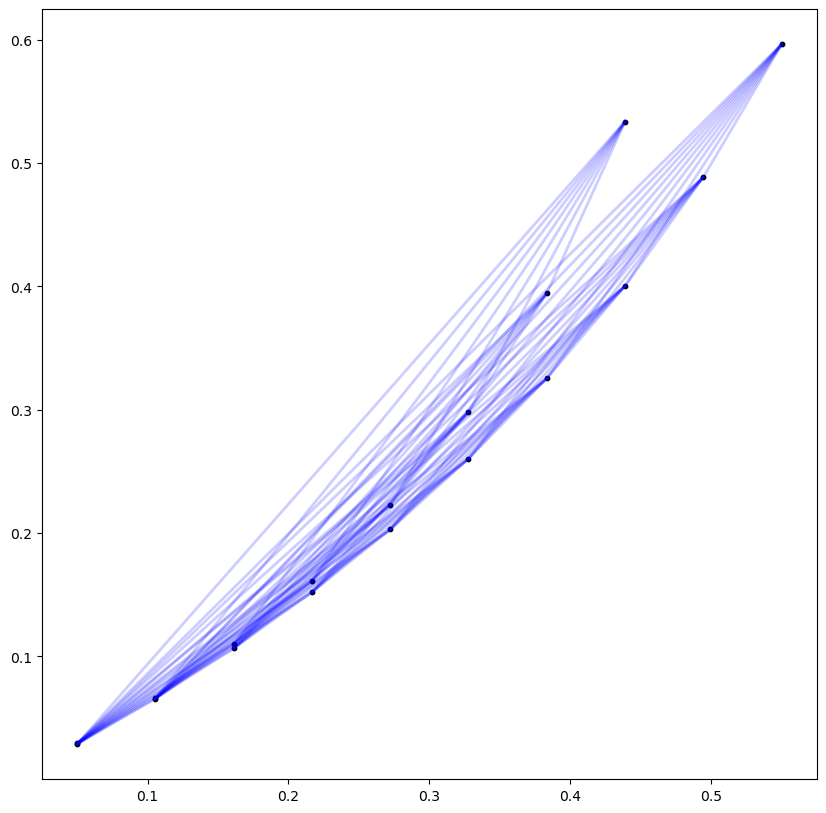

In [13]:
# Plot the graph
def plot_graph(sample):
    _, ax = plt.subplots(figsize=(10,10))
    ax.plot(sample.x[sample.edge_index,0], sample.x[sample.edge_index,1], c='b', alpha=0.1, linewidth=2)
    ax.scatter(sample.x[:,0], sample.x[:,1], s=10, c="k")
    plt.show()

plot_graph(sample)

## Train Model

In [14]:
logger = WandbLogger(
    project="InfluencerDummy", group="InitialTest", save_dir=config["artifacts"]
)
trainer = Trainer(
    gpus=1, max_epochs=config["max_epochs"], logger=logger, num_sanity_val_steps=0
)
trainer.fit(model)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: murnanedaniel. Use `wandb login --relogin` to force relogin


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


Setting up the data...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type | Params
------------------------------
------------------------------
72        Trainable params
0         Non-trainable params
72        Total params
0.000     Total estimated model params size (MB)


Epoch 0:  50%|█████     | 1/2 [00:00<00:00,  5.02it/s, loss=2.84, v_num=slzg]Influencer spread: 1
Rep eff: 1.0, rep pur: 0.5061728358268738, rep dup: 8.0
Cluster eff: 0.9999999403953552, cluster pur: 0.5061728358268738
Epoch 1:  50%|█████     | 1/2 [00:00<00:00,  6.51it/s, loss=2.83, v_num=slzg]Influencer spread: 1
Rep eff: 1.0, rep pur: 0.5061728358268738, rep dup: 8.0
Cluster eff: 0.9999999403953552, cluster pur: 0.5061728358268738
Epoch 2:  50%|█████     | 1/2 [00:00<00:00,  3.44it/s, loss=2.82, v_num=slzg]Influencer spread: 1
Rep eff: 1.0, rep pur: 0.5061728358268738, rep dup: 8.0
Cluster eff: 0.9999999403953552, cluster pur: 0.5061728358268738
Epoch 3:  50%|█████     | 1/2 [00:00<00:00,  7.06it/s, loss=2.8, v_num=slzg] Influencer spread: 1
Rep eff: 1.0, rep pur: 0.5061728358268738, rep dup: 8.0
Cluster eff: 0.9999999403953552, cluster pur: 0.5061728358268738
Epoch 4:  50%|█████     | 1/2 [00:00<00:00,  4.27it/s, loss=2.78, v_num=slzg]Influencer spread: 1
Rep eff: 1.0, rep pur: 0.5